## Research question/interests

I want to see correlation betweeen team and standings, as well as driver and nationality

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables
import csv

In [2]:
print(pd.__version__)

1.3.2


In [14]:
f1data = pd.read_csv("../f1data.csv")

In [4]:
f1data

,Pos,Driver,Nationality,Car,PTS,Year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950
...,...,...,...,...,...,...
1568,17,Kevin Magnussen MAG,DEN,Haas Ferrari,1.0,2020
1569,18,Kimi RÃ¤ikkÃ¶nen RAI,FIN,Alfa Romeo Racing Ferrari,0.0,2020
1570,19,Nicholas Latifi LAT,CAN,Williams Mercedes,0.0,2020
1571,20,George Russell RUS,GBR,Williams Mercedes,0.0,2020


## Milestone 3 Task 1 (EDA)

In [5]:
f1data.shape

(1573, 6)

In [6]:
f1data.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS', 'Year'], dtype='object')

In [7]:
f1data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PTS,Year
count,1573.000000,1573.000000
mean,27.207883,1985.148760
std,52.585197,20.744311
min,0.000000,1950.000000
25%,3.000000,1967.000000
50%,8.000000,1985.000000
75%,28.000000,2004.000000
max,413.000000,2020.000000


<AxesSubplot:xlabel='Pos', ylabel='PTS'>

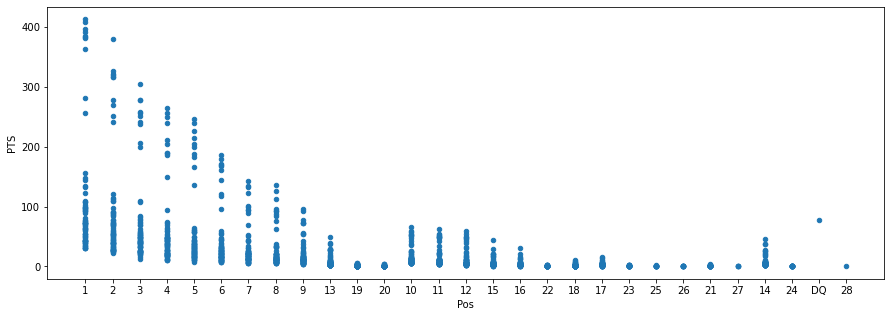

In [8]:
f1data.plot(kind='scatter', x='Pos', y='PTS',figsize=(15,5))

<AxesSubplot:xlabel='Nationality', ylabel='PTS'>

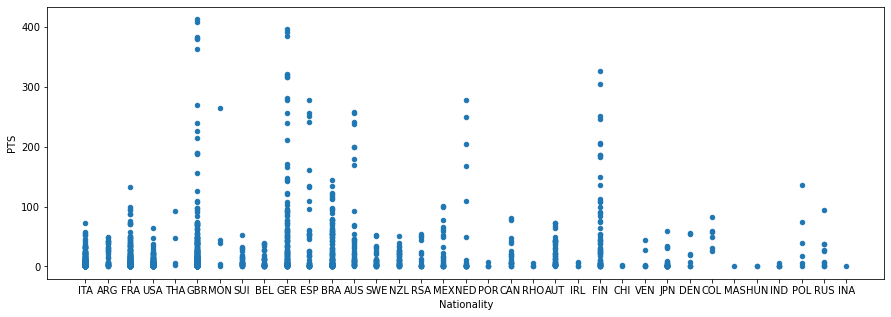

In [9]:
f1data.plot(kind='scatter', x='Nationality', y='PTS',figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

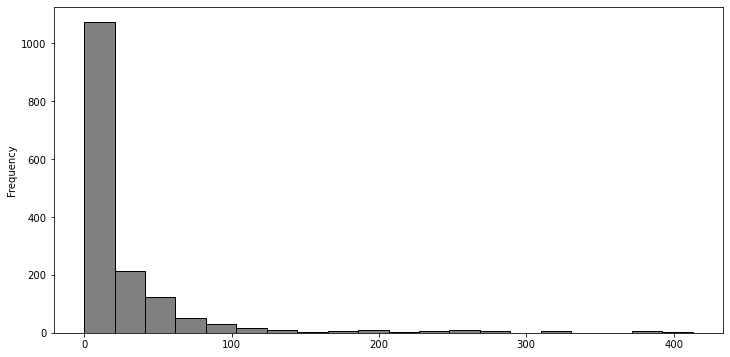

In [10]:
f1data['PTS'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

## MS3 Task 2

In [16]:
f1data.rename(columns={"Car": "Team", "Pos": "Position"}, inplace=True)

In [12]:
#Checking to see if there are any null values.
f1data.isnull().any(axis=None)
print("Preview of data with null values:")
print(f1data[f1data.isnull().any(axis=1)])
plt.show()

Preview of data with null values:
    Position                  Driver Nationality Team   PTS  Year
16        13     Dorino Serafini SER         ITA  NaN   3.0  1950
17        13  Philippe Etancelin ETA         FRA  NaN   3.0  1950
21        20      Eugene Chaboud CHA         FRA  NaN   1.0  1950
35        12        Louis Rosier ROS         FRA  NaN   3.0  1951
53        13         Ken Wharton WHA         GBR  NaN   3.0  1952
309       18      Masten Gregory GRE         USA  NaN   0.0  1963
314       18       Mike Hailwood HAI         GBR  NaN   0.0  1963
446       13     Richard Attwood ATT         GBR  NaN   3.0  1969
478        2     Ronnie Peterson PET         SWE  NaN  33.0  1971
492       16        Mark Donohue DON         USA  NaN   4.0  1971
493       16     Henri Pescarolo PES         FRA  NaN   4.0  1971


In [30]:
#Replacing the found null values in Team with Independant to properly represent information and allow visualization to be better represented
f1data["Team"].fillna("Independant", inplace=True)

In [18]:
f1data.loc[21,:]

Position                       20
Driver         Eugene Chaboud CHA
Nationality                   FRA
Team                  Independant
PTS                           1.0
Year                         1950
Name: 21, dtype: object

In [19]:
#checking the delimiter
sniffer = csv.Sniffer()
dialect = sniffer.sniff("first, second, third, fourth")
print(dialect.delimiter)

,


In [29]:
#changing kimi's name so its spelt correctly
f1data['Driver'] = f1data['Driver'].replace(['Kimi RÃ¤ikkÃ¶nen RAI'],'Kimi Räikkönen RAI')
i=f1data[f1data['Driver']=='Kimi Räikkönen RAI']

In [21]:
#separating the driver id off of the Driver name, and adding it to a new column
f1data["Driver_ID"] = f1data["Driver"].str[-3:]
f1data["Driver2"] = f1data["Driver"].str[:-3]
f1data = f1data.drop(columns=["Driver"])
f1data.rename(columns={"Driver2": "Driver"}, inplace=True)

In [23]:
f1data = f1data[["Driver", "Driver_ID", "Nationality", "Team", "Position", "PTS", "Year"]]
f1data

,Driver,Driver_ID,Nationality,Team,Position,PTS,Year
0,Nino Farina,FAR,ITA,Alfa Romeo,1,30.0,1950
1,Juan Manuel Fangio,FAN,ARG,Alfa Romeo,2,27.0,1950
2,Luigi Fagioli,FAG,ITA,Alfa Romeo,3,24.0,1950
3,Louis Rosier,ROS,FRA,Talbot-Lago,4,13.0,1950
4,Alberto Ascari,ASC,ITA,Ferrari,5,11.0,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,DEN,Haas Ferrari,17,1.0,2020
1569,Kimi Räikkönen,RAI,FIN,Alfa Romeo Racing Ferrari,18,0.0,2020
1570,Nicholas Latifi,LAT,CAN,Williams Mercedes,19,0.0,2020
1571,George Russell,RUS,GBR,Williams Mercedes,20,0.0,2020


In [28]:
## This was done to make more sense of the data and have look cleaner

In [27]:
#Checking for duplicates
duplicateRowsDF = f1data[f1data.duplicated()]
if duplicateRowsDF.empty:
    print("There are no duplicate rows"),
else:
    print("Duplicate Rows except first occurrence based on all columns are:")
    print(duplicateRowsDF)

There are no duplicate rows


## Milestone 3, Task 3

In [26]:
def load_and_process(csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(csv_file)
        .rename(columns={"Car": "Team", "Pos": "Position"})
        .fillna("Independant")
        .replace(["Kimi RÃ¤ikkÃ¶nen RAI"],"Kimi Räikkönen RAI")
        
        )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .assign(Driver_ID = df1["Driver"].str[-3:],Driver2 = df1["Driver"].str[:-3])
        .drop(columns=["Driver"])
        .rename(columns={"Driver2": "Driver"})
        [["Driver", "Driver_ID", "Team", "Nationality", "PTS", "Position", "Year"]]
      )

    # Make sure to return the latest dataframe

    return df2 


load_and_process("../f1data.csv")

,Driver,Driver_ID,Team,Nationality,PTS,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020
